<a href="https://colab.research.google.com/github/subhashpolisetti/Automated-ML-with-PyCaret/blob/main/Binary_Classifier_Using_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret Binary Classification

PyCaret is an open-source, low-code machine learning library in Python that streamlines machine learning workflows. It serves as an end-to-end tool for machine learning and model management, significantly speeding up the experimentation cycle and enhancing productivity.

In this section, I will demonstrate multiclass classification along with the requirements for running the code.

### Installation

PyCaret is tested and supported on the following 64-bit systems:

- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret using Python's pip package manager:

```bash
pip install pycaret


In [1]:
# Install PyCaret for machine learning workflows
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This c

### PyCaret Binary Classification Module Overview

PyCaret's **Binary Classification Module** is designed to predict one of two possible outcomes based on input data. It is used for problems where the target variable has only two classes, such as predicting whether a transaction is fraudulent or not, whether a customer will churn, or whether a medical test result is positive or negative.

This module simplifies the entire machine learning pipeline with extensive **preprocessing capabilities** provided through the `setup` function, including data normalization, missing value handling, and feature engineering. PyCaret's binary classification module supports **over 20 algorithms**, including logistic regression, decision trees, random forests, support vector machines, and more.

Additionally, the module offers various performance metrics such as accuracy, AUC (Area Under the Curve), precision, recall, and F1 score, along with visualizations like ROC curves, confusion matrices, and precision-recall plots, allowing users to evaluate and interpret model performance easily.

With PyCaret's **low-code framework**, you can replace complex workflows with just a few lines of code, making it an ideal tool for beginners and experienced data scientists alike.

With PyCaret's low-code framework, you can replace complex workflows with just a few lines of code, making it an ideal tool for beginners and experienced data scientists alike.

1. **Setup**: Initialize the environment and prepare the data.
2. **Compare Models**: Evaluate and compare different regression algorithms.
3. **Analyze Model**: Gain insights into the selected model's performance.
4. **Prediction**: Make predictions using the trained model.
5. **Save Model**: Persist the trained model for future use.

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [5]:

# Importing the PyCaret library and checking its version
import pycaret
pycaret.__version__


'3.3.2'

In [16]:
# Fetching a Sample Dataset Using the PyCaret Dataset Module
from pycaret.datasets import get_data


# Load the employee dataset
employee_data = get_data('employee')

# Displaying the first few rows of the dataset
employee_data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### **Setup**

The `setup()` function sets up the training environment and creates a transformation pipeline. It must be called **before** using any other PyCaret function.

- **Required Parameters**:
  - `data`: The dataset to use.
  - `target`: The target (dependent) variable.

- **Optional Parameters**: Several additional parameters are available for customization.

In [17]:
# import pycaret classification and init setup
from pycaret.classification import *

# Initialize PyCaret setup with the correct dataset and target variable
employee_target = setup(employee_data, target='left', session_id=9090)

,Description,Value
0,Session id,9090
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


Once the setup is successfully executed in PyCaret, an information grid appears summarizing key experiment details:

- **Session ID**: A pseudo-random seed for reproducibility. If not provided, one is generated and shared across functions.
- **Target Type**: Automatically detected as Binary, Multiclass, or Regression.
- **Label Encoding**: Converts string target labels (e.g., 'Yes'/'No') into numeric values (0/1). If the target is already numeric, no encoding is needed.
- **Original Data Shape**: Displays the dataset's shape before any transformations.
- **Transformed Train/Test Shape**: The shape of the train and test sets after transformations.
- **Numeric Features**: The number of features classified as numerical.
- **Categorical Features**: The number of features classified as categorical.

PyCaret provides two sets of APIs that you can work with:
1. **Functional API** (as demonstrated above)
2. **Object-Oriented API** for more advanced customizations.


In [8]:


# Initialize the ClassificationExperiment object to start a classification experiment
model_experiment = ClassificationExperiment()


In [9]:
# Check the type of the 'experiment' object to confirm it's an instance of ClassificationExperiment
print(type(model_experiment))


<class 'pycaret.classification.oop.ClassificationExperiment'>


In [18]:

# init setup on experiment
model_experiment.setup(employee_data, target = 'left', session_id = 111)

,Description,Value
0,Session id,111
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [12]:
# Compare baseline models and store the best performing model
best_baseline_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9890,0.9926,0.9628,0.9910,0.9767,0.9695,0.9697,1.0470
xgboost,Extreme Gradient Boosting,0.9879,0.9930,0.9644,0.9846,0.9744,0.9664,0.9666,0.2580
lightgbm,Light Gradient Boosting Machine,0.9865,0.9943,0.9564,0.9865,0.9712,0.9623,0.9626,0.7010
et,Extra Trees Classifier,0.9846,0.9922,0.9536,0.9811,0.9671,0.9570,0.9573,0.9820
catboost,CatBoost Classifier,0.9830,0.9931,0.9464,0.9818,0.9637,0.9527,0.9530,5.4010
dt,Decision Tree Classifier,0.9762,0.9720,0.9640,0.9379,0.9507,0.9350,0.9352,0.1330
gbc,Gradient Boosting Classifier,0.9757,0.9886,0.9332,0.9638,0.9482,0.9323,0.9326,1.1440
ada,Ada Boost Classifier,0.9586,0.9821,0.9076,0.9177,0.9125,0.8853,0.8855,0.5160
knn,K Neighbors Classifier,0.9352,0.9688,0.9208,0.8270,0.8713,0.8282,0.8304,0.3630
qda,Quadratic Discriminant Analysis,0.8660,0.9129,0.8020,0.6924,0.7405,0.6512,0.6567,0.1280


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

The function call exp.compare_models() is invoking the compare_models method from the ClassificationExperiment class, which compares all baseline models and ranks them based on performance metrics.



In [19]:
# Compare baseline models and select the best-performing model
model_experiment.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9885,0.9918,0.9616,0.9898,0.9754,0.9679,0.9681,1.0420
xgboost,Extreme Gradient Boosting,0.9863,0.9919,0.9576,0.9844,0.9708,0.9618,0.9620,0.2470
lightgbm,Light Gradient Boosting Machine,0.9857,0.9939,0.9532,0.9864,0.9695,0.9601,0.9604,1.0600
et,Extra Trees Classifier,0.9855,0.9911,0.9560,0.9827,0.9691,0.9597,0.9599,1.0180
catboost,CatBoost Classifier,0.9833,0.9925,0.9456,0.9838,0.9643,0.9534,0.9538,5.3140
gbc,Gradient Boosting Classifier,0.9750,0.9873,0.9276,0.9663,0.9465,0.9302,0.9306,1.1790
dt,Decision Tree Classifier,0.9745,0.9707,0.9636,0.9318,0.9473,0.9305,0.9308,0.1440
ada,Ada Boost Classifier,0.9568,0.9811,0.9020,0.9154,0.9084,0.8801,0.8803,0.4250
knn,K Neighbors Classifier,0.9350,0.9691,0.9204,0.8267,0.8709,0.8277,0.8299,0.3250
qda,Quadratic Discriminant Analysis,0.8532,0.9163,0.8248,0.6619,0.7305,0.6324,0.6429,0.1190


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=111, verbose=0,
                       warm_start=False)

It is important to note that the output is consistent between the Functional and Object-Oriented APIs. The remaining functions in this notebook will be demonstrated using the Functional API only.


**Analyze Model**

To analyze the performance of a trained model on the test set, we can use the plot_model function. In some cases, this may necessitate re-training the model; however, in this instance, we already have the trained model available.

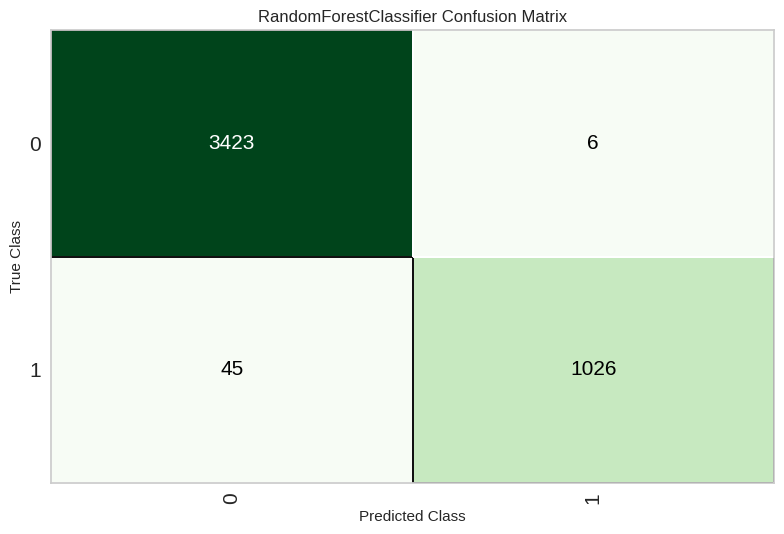

In [20]:

# plot confusion matrix :
#A confusion matrix is a visual representation that shows the performance of a classification model by displaying the counts of true positives, true negatives, false positives, and false negatives.
plot_model(best_baseline_model, plot = 'confusion_matrix')

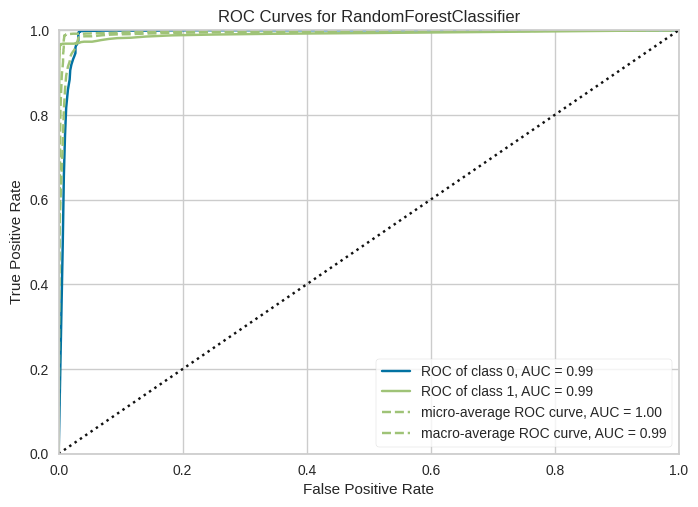

In [22]:
# plot AUC -> (Area Under the Curve) graph
plot_model(best_baseline_model, plot = 'auc')

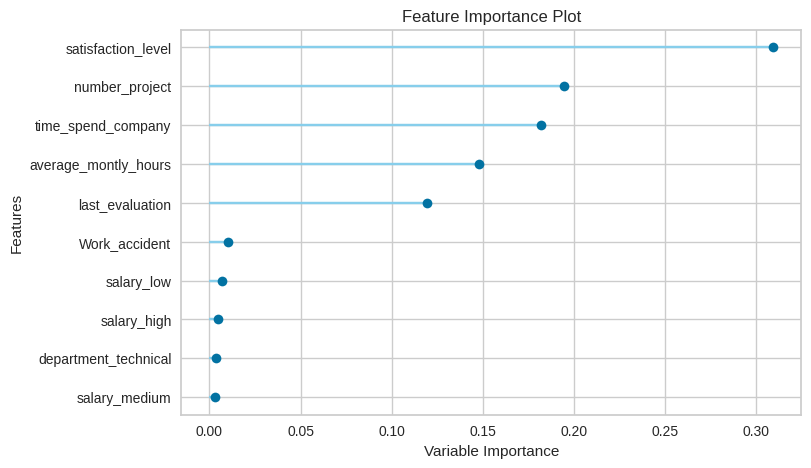

In [23]:
# plot feature importance
plot_model(best_baseline_model, plot = 'feature')

In [24]:
#The evaluate_model function creates interactive visualizations of various performance metrics for the selected best-performing model, allowing you to analyze its results within the notebook environment.
evaluate_model(best_baseline_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction

The `predict_model` function generates predictions by adding two new columns to the provided dataframe:
1. `prediction_label` – The predicted class for each row.
2. `prediction_score` – The probability or confidence level of the predicted class.

If no data is explicitly passed to the function, the `predict_model` function will default to using the test dataset created during the setup process.


In [25]:
# Generate predictions on the test set using the best-performing model
test_predictions = predict_model(best_baseline_model)  # 'best' refers to the model selected from previous evaluations


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9887,0.9915,0.9580,0.9942,0.9757,0.9684,0.9686


In [26]:
# Display the first few rows of the predictions dataframe
test_predictions.head()  # This shows the predicted labels and scores for the test set


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,prediction_label,prediction_score
2902,0.93,0.98,4,160,3,0,0,sales,low,0,0,1.00
10613,0.90,0.81,4,175,3,0,0,management,medium,0,0,1.00
9192,0.40,0.42,3,146,2,1,0,hr,medium,0,0,0.98
7135,0.33,0.61,2,163,3,0,0,technical,medium,0,0,0.95
3228,0.13,0.80,5,203,5,0,0,sales,medium,0,0,0.97


## Predicting Labels on Unseen Dataset

The same function can be utilized to predict labels on an unseen dataset. We will create a copy of the original data and remove any default labels. This allows us to use the new dataframe without labels for scoring.


In [27]:
# Create a copy of the data and remove the Class variable

New_data_set = employee_data.copy()
New_data_set.drop('Work_accident', axis=1, inplace=True)
# Add a placeholder for 'Embarked'
New_data_set['Work_accident'] = 0.0
New_data_set.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,department,salary,left,Work_accident
0,0.38,0.53,2,157,3,0,sales,low,1,0.0
1,0.80,0.86,5,262,6,0,sales,medium,1,0.0
2,0.11,0.88,7,272,4,0,sales,medium,1,0.0
3,0.72,0.87,5,223,5,0,sales,low,1,0.0
4,0.37,0.52,2,159,3,0,sales,low,1,0.0


In [28]:

# predict model on new_data
predictions = predict_model(best_baseline_model, data = New_data_set)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9956,0.9979,0.9840,0.9974,0.9907,0.9878,0.9879


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,department,salary,Work_accident,left,prediction_label,prediction_score
0,0.38,0.53,2,157,3,0,sales,low,0.0,1,1,1.00
1,0.80,0.86,5,262,6,0,sales,medium,0.0,1,1,1.00
2,0.11,0.88,7,272,4,0,sales,medium,0.0,1,1,1.00
3,0.72,0.87,5,223,5,0,sales,low,0.0,1,1,0.97
4,0.37,0.52,2,159,3,0,sales,low,0.0,1,1,1.00


**Save Model**

To conclude, we can save the entire pipeline to disk for future use by utilizing PyCaret's save_model function.

In [29]:
# save pipeline
save_model(best_baseline_model, 'second_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['satisfaction_level',
                                              'last_evaluation',
                                              'number_project',
                                              'average_montly_hours',
                                              'time_spend_company',
                                              'Work_accident',
                                              'promotion_last_5years'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               miss...
 

In [30]:
# Load pipeline
best_pipeline_model = load_model('second_pipeline')
best_pipeline_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=9090, verbose=0,
                                        warm_start=False))],
         verbose=False)